In [36]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
%matplotlib inline
import os 
print(os.getcwd())

/Users/jrandolph37/Documents/Jupyter GItlab/pepp-virt-mal-fin-pt-07-2021-u-c/homework/Instructions/Starter_Code/Resources


In [3]:
#Algorithmic Returns Read and Manupulation Data 
algo_returns_df=pd.read_csv(Path("algo_returns.csv"))
algo_returns_df.set_index(algo_returns_df['Date'], inplace = True)
algo_returns_df["Date"]=pd.to_datetime(algo_returns_df["Date"], dayfirst=True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.drop(columns=["Date"], inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [4]:
# Counting Nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [5]:
#dropping those nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [6]:
#make sure nulls dropped
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [40]:
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
#S&P 500 read and manipulation data
sp500_df=data_df=pd.read_csv(Path("sp500_history.csv"))
sp500_df["Date"]=pd.to_datetime(sp500_df["Date"], dayfirst=True)
sp500_df.set_index(sp500_df['Date'], inplace=True)
sp500_df.sort_index(ascending = True, inplace = True)
sp500_df.drop(columns=["Date"], inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [8]:
#check data types
sp500_df.dtypes

Close    object
dtype: object

In [9]:
#fix data types
sp500_df["Close"]= sp500_df["Close"].str.replace('$','').astype("float")
sp500_df.sort_index(inplace = True)
sp500_df

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [10]:
#double check data types
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
#Drop Nulls
sp500_returns_df.dropna(inplace = True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
#rename the close colum to "s&p"
sp500_returns_df.rename(columns = {"Close":"sp500"}, inplace = True)
sp500_returns_df

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
#reading and cleaning Whale Data
whale_returns_df=pd.read_csv(Path("whale_returns.csv"))
whale_returns_df["Date"]=pd.to_datetime(whale_returns_df["Date"], dayfirst=True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=["Date"], inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [15]:
#identifying Nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
#dropping nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [45]:
#compilation of mega frame known as....returns
daily_returns_df=pd.concat([whale_returns_df,algo_returns_df,sp500_returns_df], axis = "columns", join="outer",)
daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000872
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,0.003624
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007174
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.000322
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,-0.003457
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,NaN,NaN,NaN
2019-04-26,0.008149,0.009162,0.012355,0.010434,NaN,NaN,NaN
2019-04-29,0.001254,0.002719,0.006251,0.005223,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

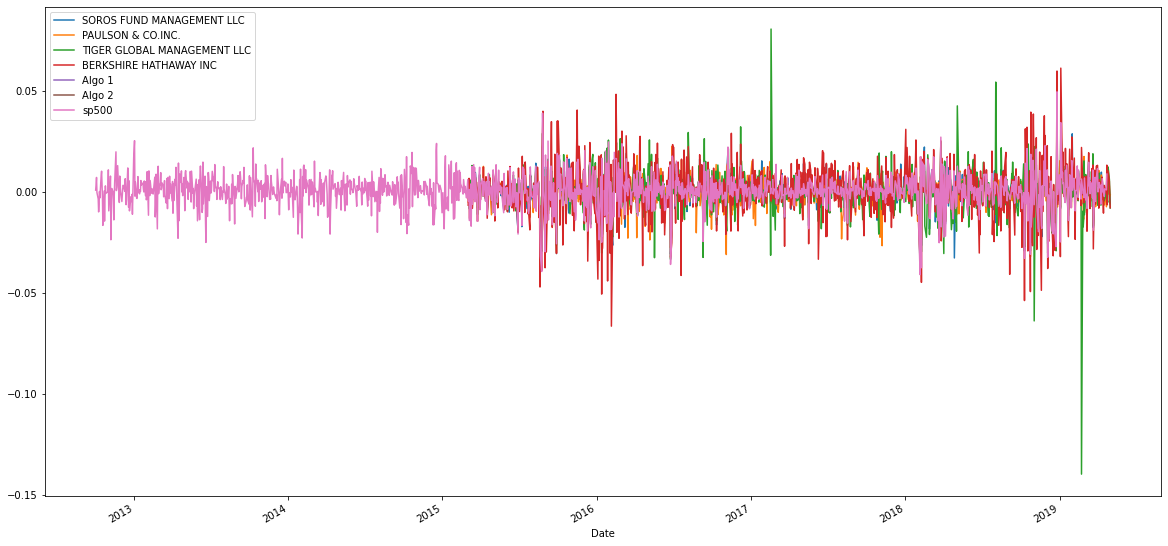

In [18]:
#daily returns plotted
daily_returns_df.plot(figsize= (20,10))

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

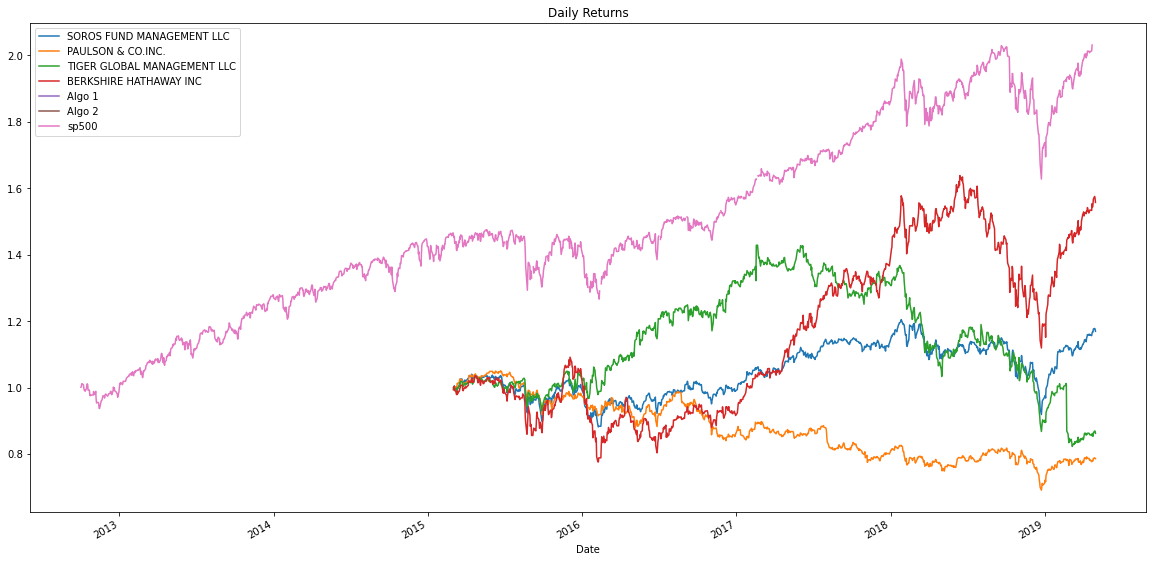

In [22]:
#calculation of cumulative returns (Algo 1 outperforms)
cumal_returns_df = (1+ daily_returns_df).cumprod()
cumal_returns_df.plot(title="Daily Returns", figsize = (20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

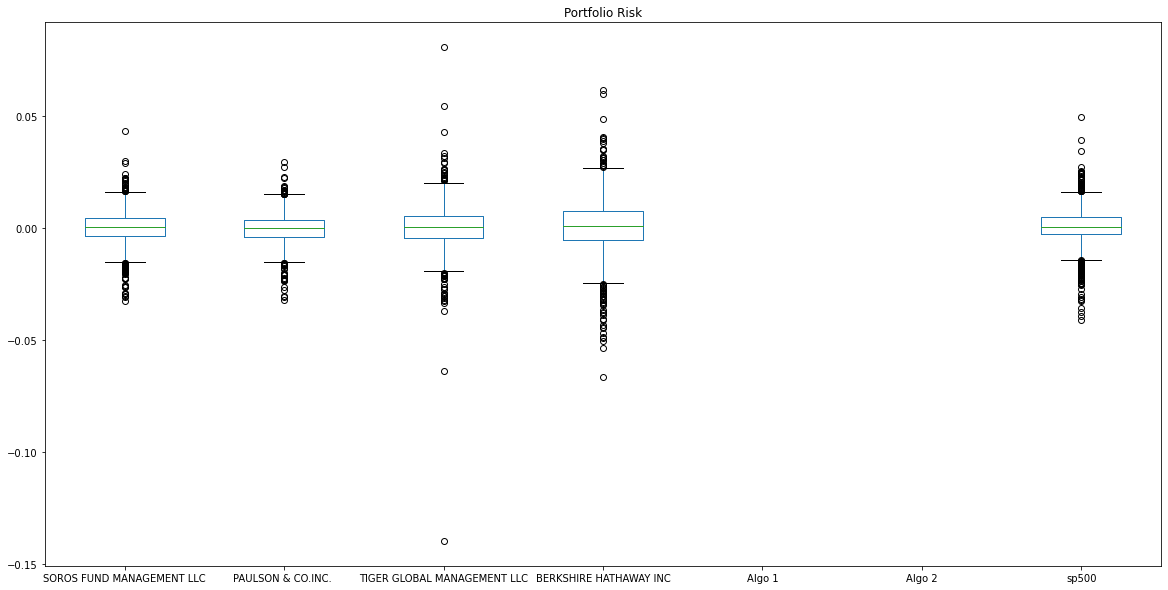

In [20]:
#boxplot of returns
daily_returns_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [23]:
#std deviation for each portfolio
daily_std = daily_returns_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
sp500                          0.008111
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
Algo 1                              NaN
Algo 2                              NaN
dtype: float64

In [27]:
#Berk and Tiger have a higher riske than the 500
higher_sp_risk_df=[daily_std > daily_std['sp500']]
higher_sp_risk_df

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 sp500                          False
 SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 Algo 1                         False
 Algo 2                         False
 dtype: bool]

In [28]:
#aannualized standard deviation 
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203682
TIGER GLOBAL MANAGEMENT LLC    0.171830
sp500                          0.128762
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
Algo 1                              NaN
Algo 2                              NaN
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

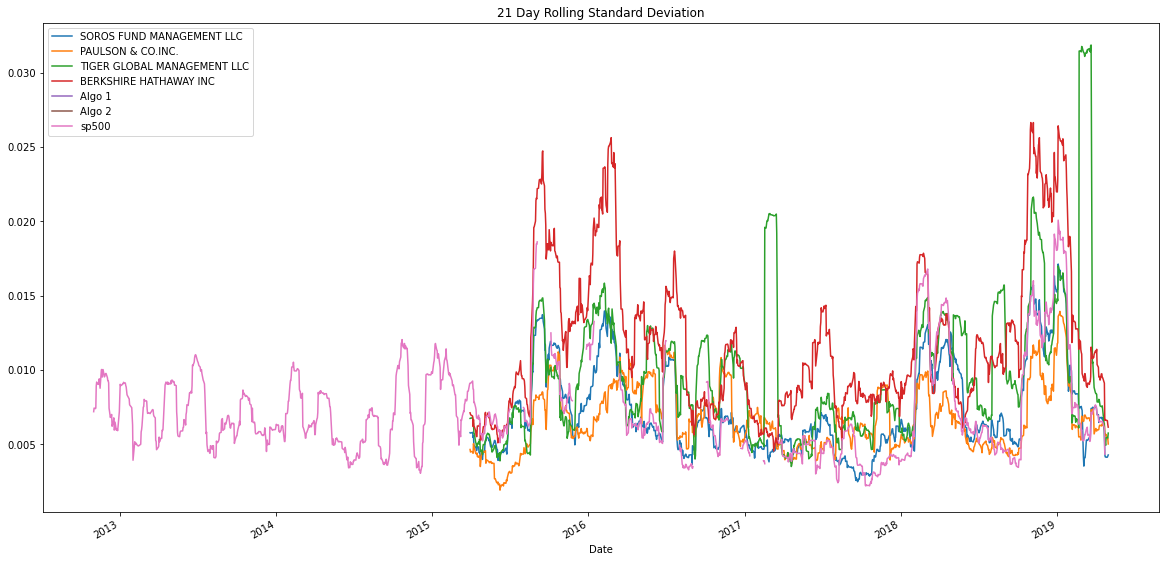

In [29]:
#rolling std
daily_returns_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))


In [30]:
#correlation between each stock determining that some stocks mimic
correlation = daily_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,NaN,NaN,0.837864
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,NaN,NaN,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,NaN,NaN,0.623946
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,NaN,NaN,0.751371
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp500,0.837864,0.669732,0.623946,0.751371,NaN,NaN,1.000000


<AxesSubplot:>

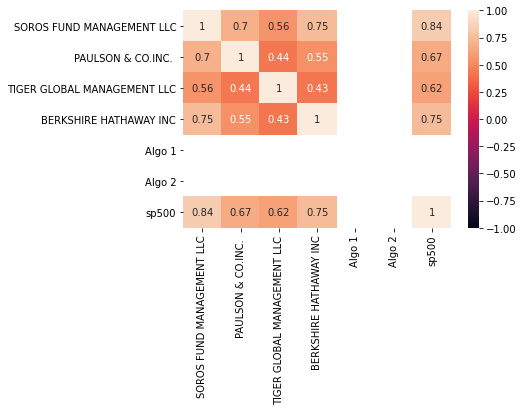

In [37]:
#heatmap correlation
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

In [38]:
#rolling beta averages
algo_2_covariance = daily_returns_df['Algo 2'].rolling(window=60).cov(daily_returns_df['sp500'])
algo_2_covariance

Date
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
2012-10-08   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Length: 1664, dtype: float64

In [46]:
#rolling averages
variance = daily_returns_df['sp500'].rolling(window=60).var()
variance

Date
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
2012-10-08   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Name: sp500, Length: 1664, dtype: float64

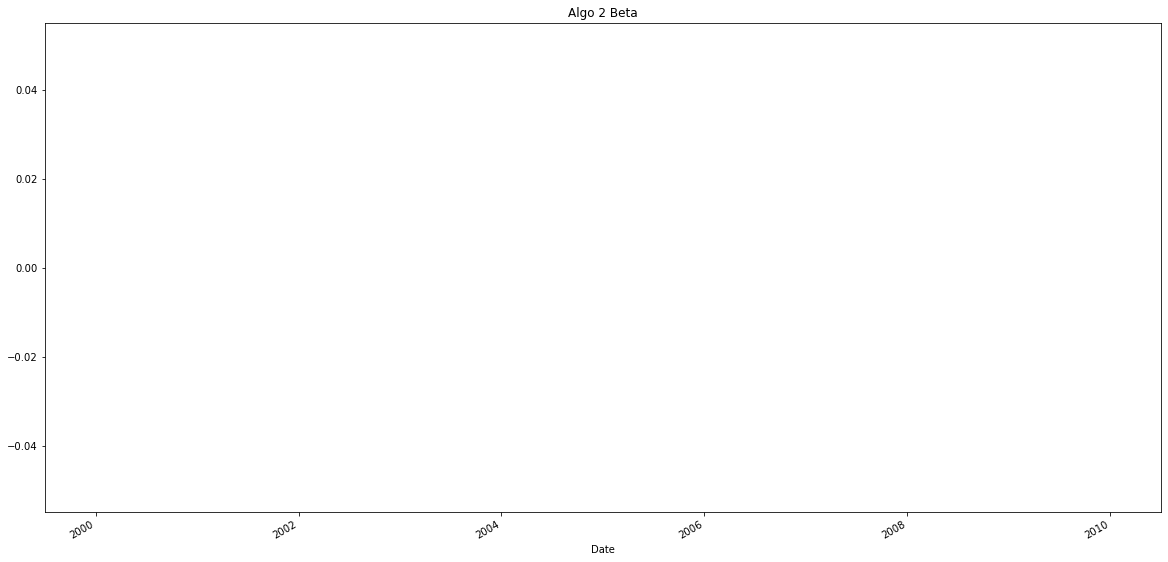

In [47]:
algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

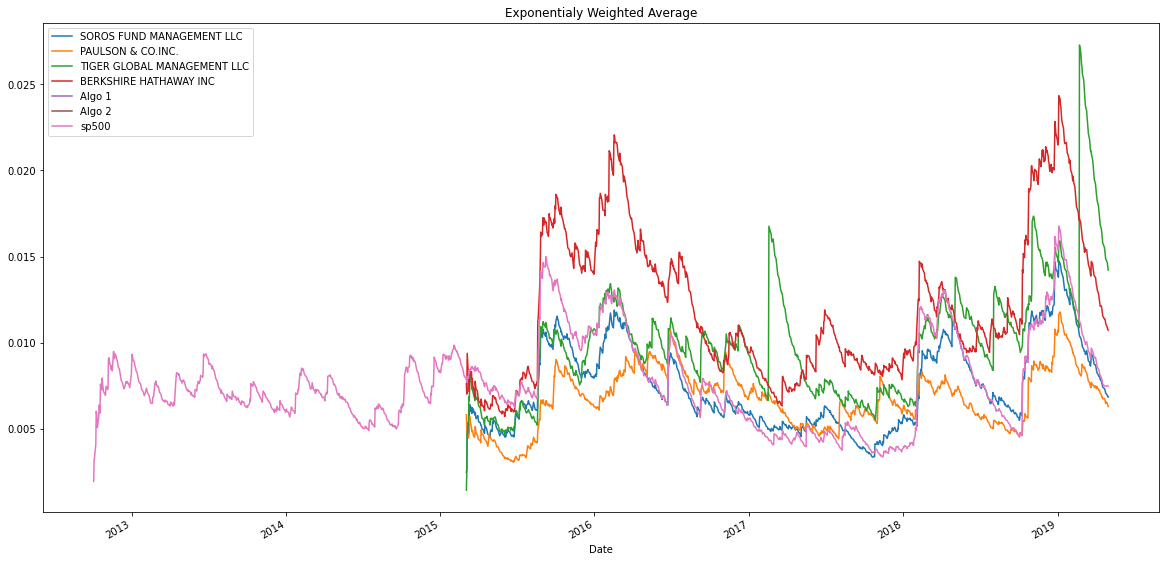

In [49]:
rolling_window_ewma = daily_returns_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

In [51]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (daily_returns_df.mean() * 252) / (daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                              NaN
Algo 2                              NaN
sp500                          0.906028
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

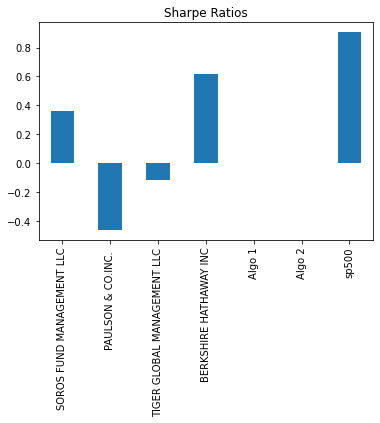

In [52]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [78]:
#custom portfolio creation
goog_history_csv=Path("goog_historical.csv")
goog_history_df=pd.read_csv(goog_history_csv)
goog_history_df.set_index(goog_history_df['Trade DATE'], inplace = True)
goog_history_df.drop(columns=["Trade DATE", "Symbol"], inplace=True)
goog_history_df.rename(columns = {"NOCP":"GOOG"}, inplace = True)
goog_history_df.head()

,GOOG
Trade DATE,
5/9/2019,1162.38
5/8/2019,1166.27
5/7/2019,1174.10
5/6/2019,1189.39
5/3/2019,1185.40


In [77]:
cost_history_csv=Path("cost_historical.csv")
cost_history_df=pd.read_csv(cost_history_csv)
cost_history_df.set_index(cost_history_df['Trade DATE'], inplace = True)
cost_history_df.drop(columns=["Trade DATE", "Symbol"], inplace=True)
cost_history_df.rename(columns = {"NOCP":"COST"}, inplace = True)
cost_history_df.head()

,COST
Trade DATE,
5/9/2019,243.47
5/8/2019,241.34
5/7/2019,240.18
5/6/2019,244.23
5/3/2019,244.62


In [76]:
aapl_history_csv=Path("aapl_historical.csv")
aapl_history_df=pd.read_csv(aapl_history_csv)
aapl_history_df.set_index(aapl_history_df['Trade DATE'], inplace = True)
aapl_history_df.drop(columns=["Trade DATE", "Symbol"], inplace=True)
aapl_history_df.rename(columns = {"NOCP":"AAPL"}, inplace = True)
aapl_history_df.head()

,AAPL
Trade DATE,
5/9/2019,200.72
5/8/2019,202.90
5/7/2019,202.86
5/6/2019,208.48
5/3/2019,211.75


In [79]:
portfolio_combined_df = pd.concat([aapl_history_df, cost_history_df, goog_history_df], axis="columns", join="inner")

portfolio_combined_df.sort_index(inplace=True)

portfolio_combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
1/10/2019,153.80,210.64,1070.33
1/11/2019,152.29,210.51,1057.19
1/14/2019,150.00,209.00,1044.69
1/15/2019,153.07,211.03,1077.15
1/16/2019,154.94,210.18,1080.97


In [80]:
portfolio_combined_df.dropna()
portfolio_combined_df
portfolio_combined_returns = portfolio_combined_df.pct_change()
portfolio_combined_returns.dropna(inplace=True)
portfolio_combined_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
1/17/2019,0.005938,0.006090,0.008261


In [81]:
#weighted returns of the folio 
weights = [1/3, 1/3, 1/3]
portfolio_weighted_returns = portfolio_combined_returns.dot(weights)
portfolio_weighted_returns.head()
portfolio_weighted_returns =portfolio_weighted_returns.rename("Custom")
portfolio_weighted_returns.head()

Trade DATE
1/11/2019   -0.007571
1/14/2019   -0.011345
1/15/2019    0.020417
1/16/2019    0.003912
1/17/2019    0.006763
Name: Custom, dtype: float64

In [83]:
#added to dataframe
combined_portfolios_2_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df, portfolio_weighted_returns], axis='columns', join='outer')
combined_portfolios_2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000872,NaN
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,0.003624,NaN
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007174,NaN
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.000322,NaN
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,-0.003457,NaN


<AxesSubplot:title={'center':'Daily Returns'}>

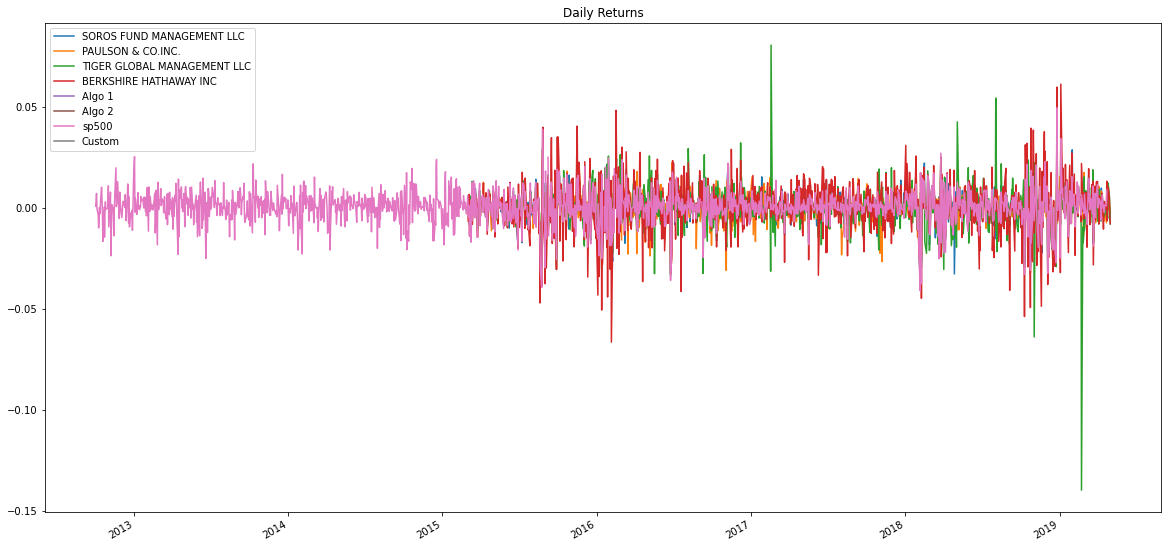

In [84]:
# Plot daily returns
combined_portfolios_2_df.plot( title="Daily Returns" , figsize=(20,10))

<AxesSubplot:>

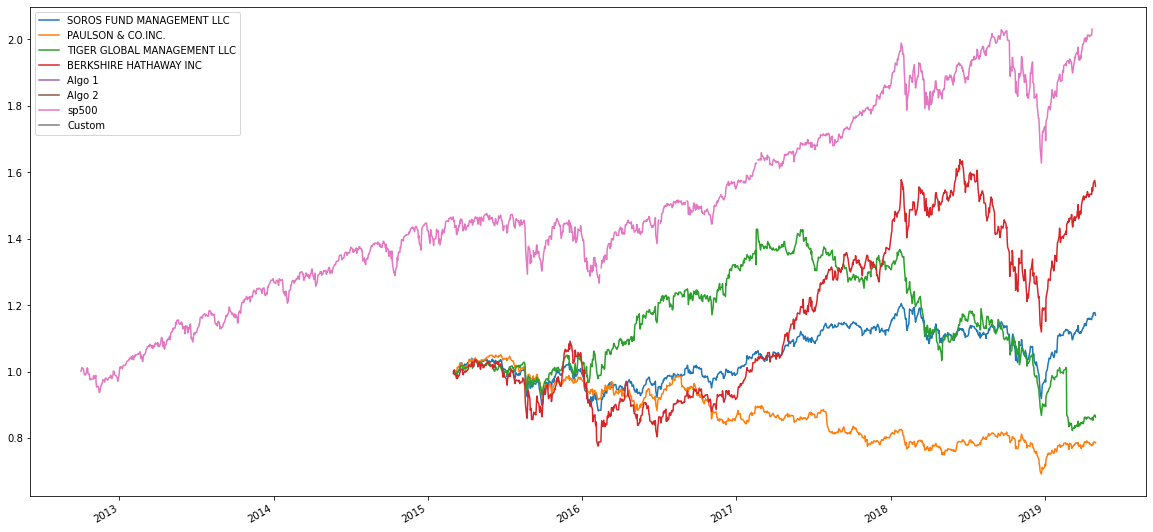

In [85]:
# Plot cumulative returns
combined_portfolios_2_df_cumulative_returns = (1 + combined_portfolios_2_df).cumprod()
combined_portfolios_2_df_cumulative_returns.head()
combined_portfolios_2_df_cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

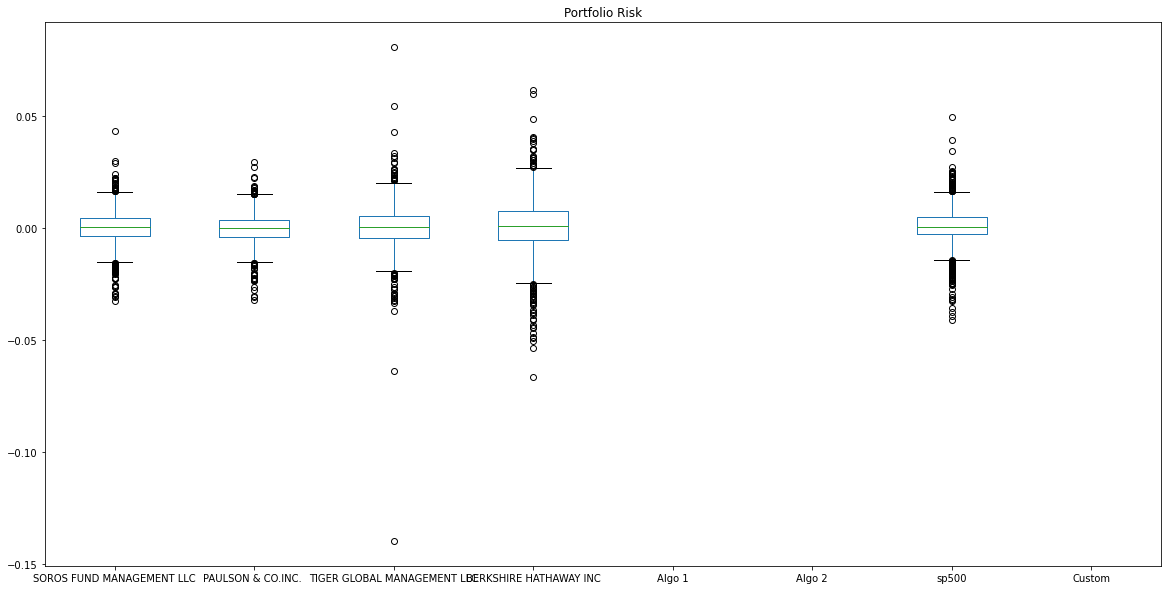

In [86]:
# Box plot to visually show risk
combined_portfolios_2_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [87]:
combined_portfolios_2_df_daily_std = combined_portfolios_2_df.std().sort_values(ascending=False)
combined_portfolios_2_df_daily_std

BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
sp500                          0.008111
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
Algo 1                              NaN
Algo 2                              NaN
Custom                              NaN
dtype: float64

In [91]:
portfolios_riskier_than_2_SP500 = [combined_portfolios_2_df_daily_std > combined_portfolios_2_df_daily_std['sp500']]
portfolios_riskier_than_2_SP500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 sp500                          False
 SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 Algo 1                         False
 Algo 2                         False
 Custom                         False
 dtype: bool]

In [92]:
combined_portfolios_2_df_annualized_std = combined_portfolios_2_df_daily_std *np.sqrt(252)
combined_portfolios_2_df_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203682
TIGER GLOBAL MANAGEMENT LLC    0.171830
sp500                          0.128762
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
Algo 1                              NaN
Algo 2                              NaN
Custom                              NaN
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

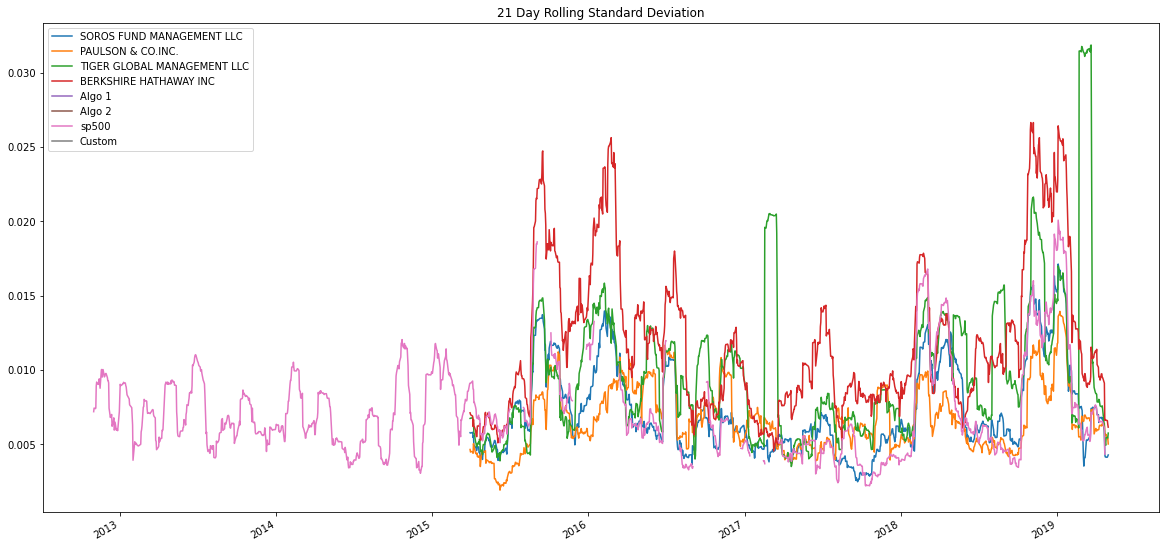

In [93]:
combined_portfolios_2_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [94]:
combined_portfolios_2_df_sharpe_ratios = (combined_portfolios_2_df.mean() * 252) / (combined_portfolios_2_df.std() * np.sqrt(252))
combined_portfolios_2_df_sharpe_ratios.sort_values(ascending=False)

sp500                          0.906028
BERKSHIRE HATHAWAY INC         0.619628
SOROS FUND MANAGEMENT LLC      0.361568
TIGER GLOBAL MANAGEMENT LLC   -0.118257
PAULSON & CO.INC.             -0.462131
Algo 1                              NaN
Algo 2                              NaN
Custom                              NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

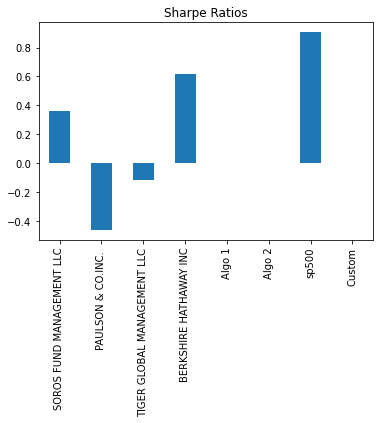

In [95]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [96]:
combined_portfolios_2_df_correlation = combined_portfolios_2_df.corr()
combined_portfolios_2_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,NaN,NaN,0.837864,NaN
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,NaN,NaN,0.669732,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,NaN,NaN,0.623946,NaN
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,NaN,NaN,0.751371,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp500,0.837864,0.669732,0.623946,0.751371,NaN,NaN,1.000000,NaN
Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

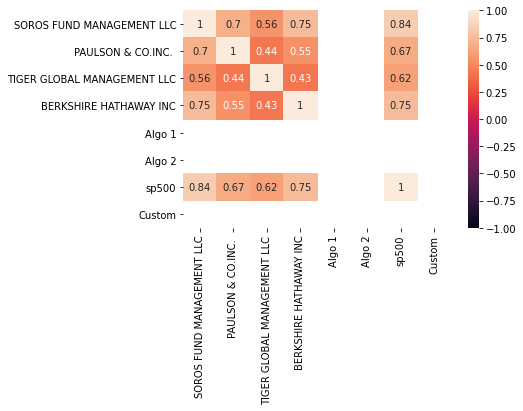

In [97]:
sns.heatmap(combined_portfolios_2_df_correlation,  vmin=-1, vmax=1,annot=True)

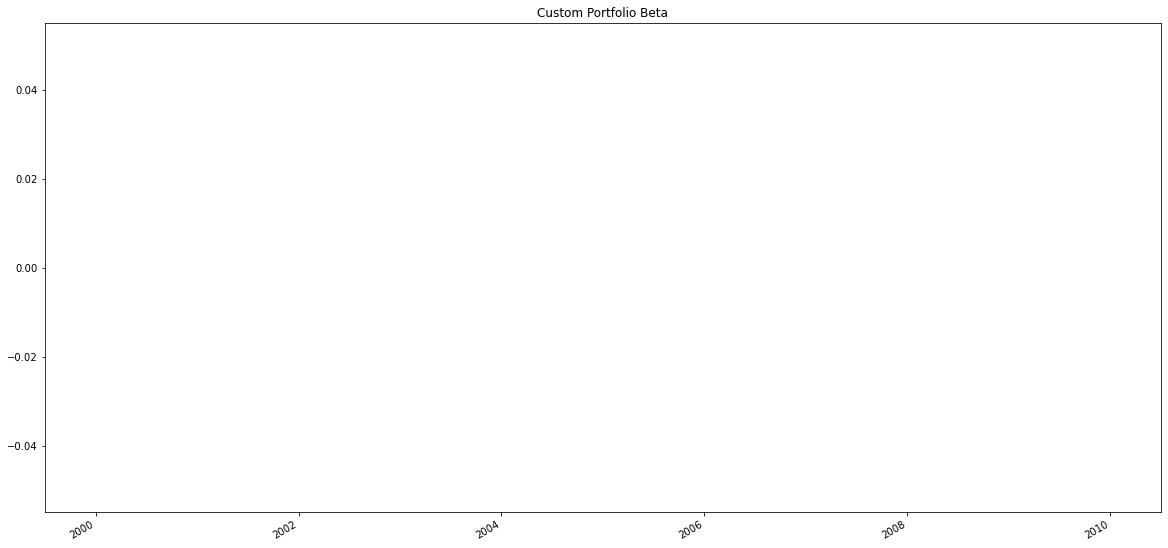

In [101]:
# Beta
custom_covariance = combined_portfolios_2_df['Custom'].rolling(window=60).cov(combined_portfolios_2_df['sp500'])
custom_covariance

variance_2 = combined_portfolios_2_df['sp500'].rolling(window=60).var()
variance_2

custom_beta = custom_covariance / variance_2
custom_beta_plot = custom_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))